In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import BytesIO
import pandas_datareader.data as dat_aq
from datetime import datetime, timedelta

import rec_mod as rm

#recession data for comparison
indrec = rm.rec_periods('INDRECD')
indrec = indrec.astype(int)

D:\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


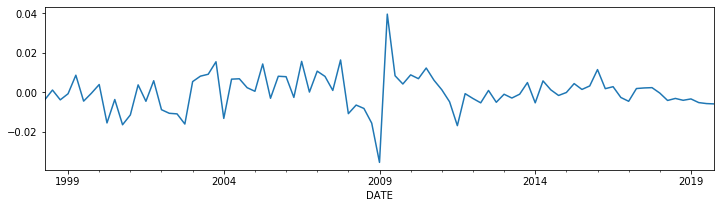

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  log_ret   No. Observations:                   83
Model:             MarkovAutoregression   Log Likelihood                 273.352
Date:                  Thu, 30 Apr 2020   AIC                           -528.705
Time:                          16:35:00   BIC                           -506.935
Sample:                      04-01-1998   HQIC                          -519.959
                           - 10-01-2019                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.001     -3.442      0.001      -0.008      -0.002
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.001      3.989      0.000       0.003       0.008
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.837e-05   1.03e-05      5.681      0.000    3.82e-05    7.85e-05
ar.L1         -0.1628      0.120     -1.353      0.176      -0.399       0.073
ar.L2         -0.0396      0.123     -0.323      0.747      -0.280       0.201
ar.L3          0.0009      0.125      0.007      0.994      -0.244       0.246
ar.L4         -0.2540      0.119     -2.130      0.033      -0.488      -0.020
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8901      0.067     13.366      0.000       0.760       1.021
p[1->0]        0.1113      0.062      1.804      0.071      -0.010       0.232
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [2]:
#result, model = SOP_Phase_1('GDPC1', 'fred', datetime(1985,1,1), datetime(2019, 10, 1), 'QS', 'log_mean_ret', 'Markov_Filardo', 2, 4, exog = 'T10Y3M', exog_ret_type = 'log_mean_ret')
#result = SOP_Phase_1('GDP', 'fred', datetime(1980,1,1), datetime(2010, 10, 1), 'QS', 'pct_chg', 'Markov_Hamilton', 2, 4)
endog_dat = rm.pull_data('NAEXKP01INQ652S', 'fred', datetime(1998,1,1), datetime(2019, 10, 1))
result, model = rm.SOP_Phase_1(endog=endog_dat, model_type='Markov_Hamilton', regimes=2, model_order=4, endog_ret_type = 'log_mean_ret')
#result, model = SOP_Phase_1('NAEXKP01INQ652S', 'fred', datetime(1998,1,1), datetime(2019, 10, 1), 'QS', 'log_mean_ret', 'Markov_Hamilton', 2, 4)
result.summary()

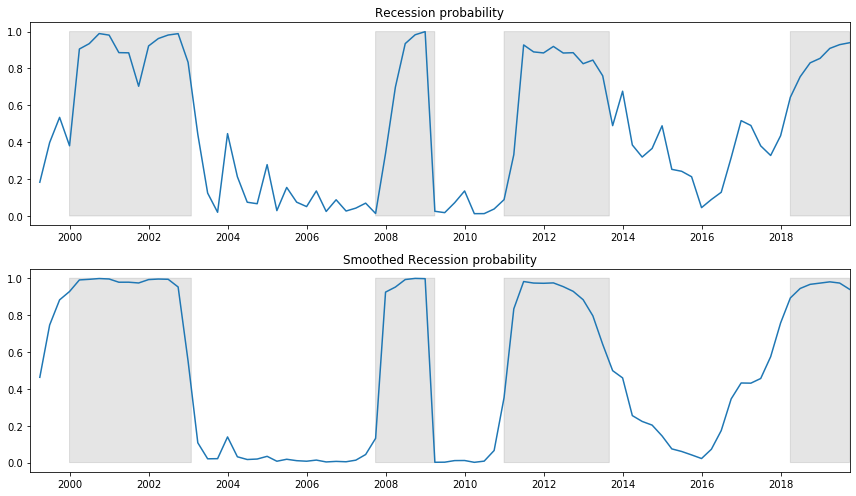

0.30261179731838767
precision =  3.3045638301664346
0.25090184019561906
smooth_precision =  3.985622421981187


In [3]:
rm.rec_prob_graph(result, indrec, datetime(1999,1,1), datetime(2019, 10, 1))

In [5]:
result.expected_durations

array([9.100693  , 8.98539964])